In [20]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("zara.csv", delimiter=";") 
print (df.head())

  Product Position Promotion Product Category Seasonal  Sales Volume   price  \
0            Aisle        No         Clothing       No          2823   19.99   
1            Aisle        No         Clothing       No           654  169.00   
2          End-cap       Yes         Clothing      Yes          2220  129.00   
3            Aisle       Yes         Clothing      Yes          1568  129.00   
4          End-cap        No         Clothing      Yes          2942  139.00   

     terms section  
0  jackets     MAN  
1  jackets     MAN  
2  jackets     MAN  
3  jackets     MAN  
4  jackets     MAN  


Este conjunto de datos de ventas de Zara contiene información sobre las ventas de productos de las tiendas Zara durante un período de tiempo específico. El conjunto de datos incluye varios atributos relevantes para las ventas, nombre del producto, categoría del producto, precio y volumen de ventas. Estos datos se pueden utilizar para analizar las tendencias de ventas de productos, el desempeño de las ventas en diferentes categorías de productos, la efectividad de las promociones, los patrones de compra de los clientes y otros factores que influyen en el desempeño de las ventas de Zara. El análisis de este conjunto de datos puede proporcionar información valiosa para la dirección de Zara a la hora de optimizar las estrategias de marketing, la gestión de inventario y otros procesos de toma de decisiones para mejorar los ingresos y la rentabilidad.

Posición del producto: la posición del producto en el catálogo o diseño de la tienda.
Promoción: Indicador de si el producto se encuentra actualmente en promoción o no.
Categoría de producto: La categoría del producto, como ropa, accesorios, zapatos, etc.
Estacional: Indicador de si el producto forma parte de una colección de temporada específica.
Volumen de Ventas: La cantidad de productos vendidos.
Nombre: Nombre del producto.
Precio: Precio del producto.
Sección: Sección o categoría donde se vende el producto en la tienda (p. ej., ropa de mujer, ropa de hombre, ropa de niño, etc.).

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  252 non-null    object 
 1   Promotion         252 non-null    object 
 2   Product Category  252 non-null    object 
 3   Seasonal          252 non-null    object 
 4   Sales Volume      252 non-null    int64  
 5   price             252 non-null    float64
 6   terms             252 non-null    object 
 7   section           252 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


In [22]:
df.shape

(252, 8)

                                 Visualización de las variables
                                           categóricas

In [23]:
print(df.columns)

Index(['Product Position', 'Promotion', 'Product Category', 'Seasonal',
       'Sales Volume', 'price', 'terms', 'section'],
      dtype='object')


<Axes: xlabel='Product Position', ylabel='count'>

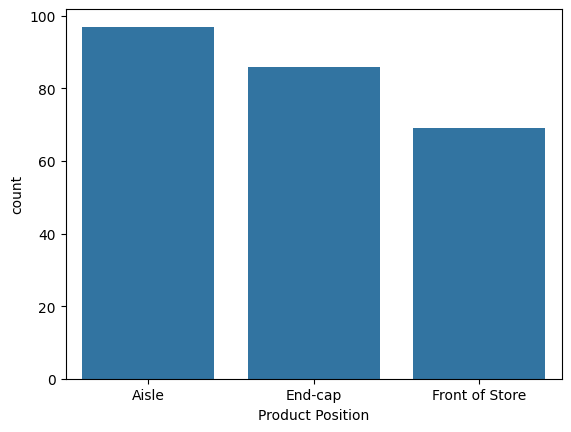

In [24]:
sns.countplot(x='Product Position',data=df)


En la anterior gráfica encontramos como se distribuyen las ventas de productos en Zara según su ubicación dentro de la tienda, teniendo en cuenta que:
- **Aisle:** Son los productos que se encuentran en el pasillo.
- **End-cap:** Son los productos en el extremo del pasillo.
- **Front of Store:** Los productos ubicados en el frente de la tienda.

A partir de esta información, podemos analizar en la gráfica que Aisle es la ubicación con las ventas más altas siendo los productos más populares entre los compradores. Esto podría deberse a la mayor visibilidad y accesibilidad de estos productos. Por otra parte, aunque las ventas de los productos End-cap son más bajas que en el pasillo, los productos en el extremo del pasillo aún tienen un buen rendimiento, estos lugares suelen ser estratégicos para destacar productos específicos o promociones. Finalmente, los productos Front of Store tienen las ventas más bajas, esto se puede dar a causa de que los compradores a menudo se dirigen directamente al pasillo o al área de interés específico en lugar de explorar el frente de la tienda.

<Axes: xlabel='Promotion', ylabel='count'>

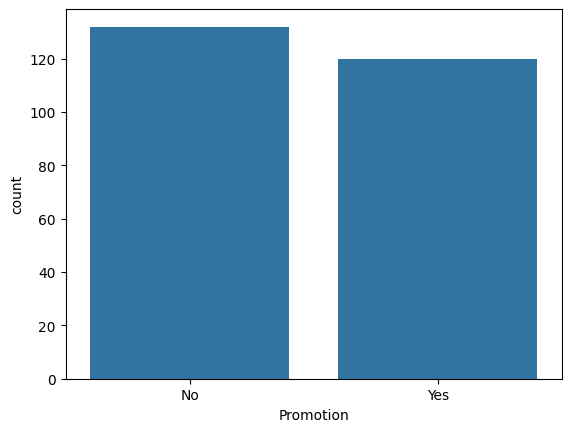

In [25]:

sns.countplot(x="Promotion",data=df)

La anterior gráfica nos muestra que la mayoría de los productos vendidos no se encontraban en promoción especifamente el 52%, sin embargo, los productos que si lo estaban no se alejan de una diferencia mínima representando el 48%. 

<Axes: xlabel='Seasonal', ylabel='count'>

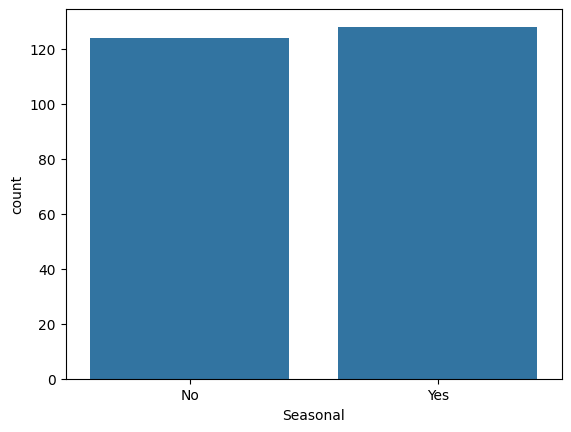

In [26]:

sns.countplot(x="Seasonal",data=df)

En la anterior gráfica podemos analizar que el 51% de las ventas se realizaron con ropa de temporada, mientras que el 49% no, esto se podría explicar gracias a que algunos países en los que se encuentra Zara, no son estacionales, así mismo, se puede explicar gracias a que los precios de las prendas que no son de temporada tienden a ser más bajos y a estar en promociones u ofertas especiales. 

<Axes: xlabel='terms', ylabel='count'>

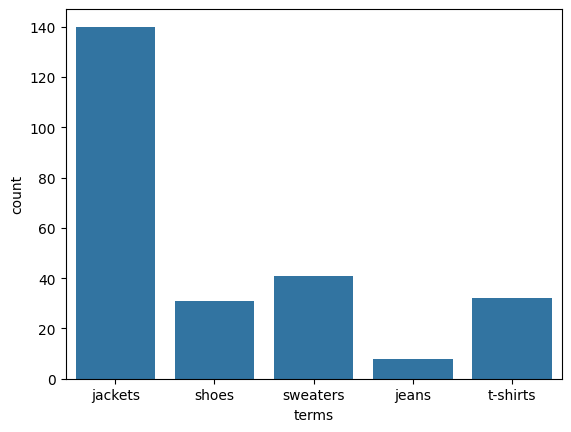

In [27]:
sns.countplot(x="terms",data=df)



 En la anterior gráfica podemos observar la clasificación de las prendas de ropa acorde a las ventas registradas. Las chaquetas fue el producto que representó la mayoría de las ventas (56%), seguido de los suéteres (16%), finalmente las camisetas con el (13%), los zapatos con el (12%) y los jeans con el (3%). Esto implica que las chaquetas se presentan como el producto preferido dentro del portafolio de Zara en ese periodo de tiempo, se pueden asociar factores como el clima o el precio de estos productos en esa temporada.

<Axes: xlabel='section', ylabel='count'>

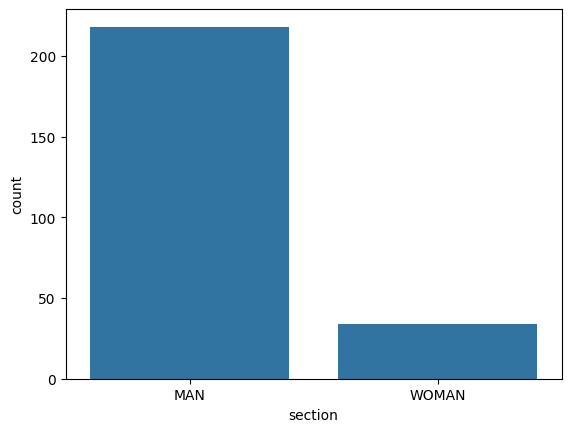

In [28]:
sns.countplot(x="section",data=df)

Se puede evidenciar que la mayor cantidad de ventas se efectuó en la sección de ropa para hombres.

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

<Axes: ylabel='Sales Volume'>

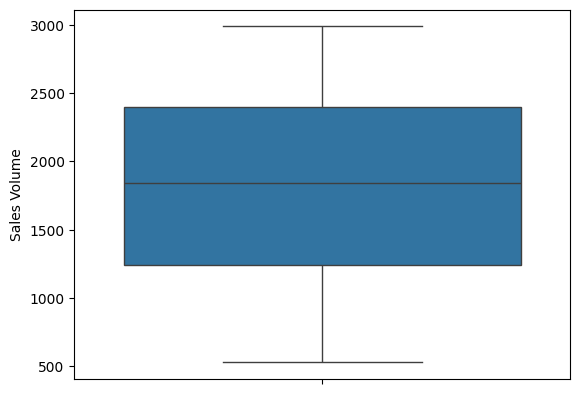

In [29]:
sns.boxplot(y="Sales Volume",data=df)

                                 Correlaciones                  

Esta gráfica muestra una distribución del volumen de ventas, con la mayoría de las observaciones concentradas en el rango entre 1500 y 2500 y una mediana cerca de 2000.

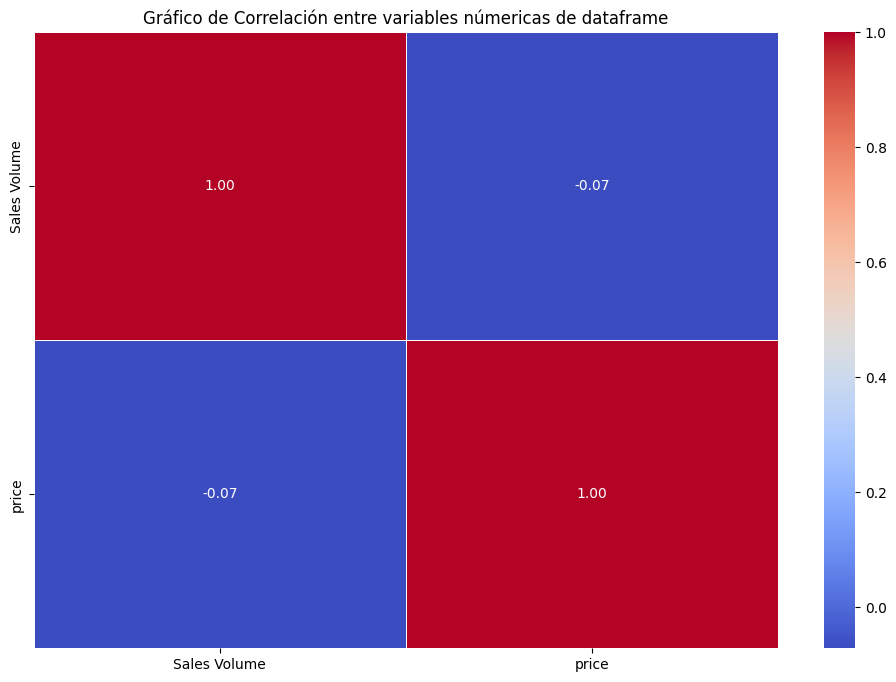

In [32]:
variables_numericas= ["Sales Volume","price",]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Para la variable dependiente precio podemos ver que las variables independientes que mayor correlacion positiva tiene es Volumen de Ventas.

                            Creación de variables Dummies

En este paso se realiza la conversión de las variables categóricas a numéricas. Es decir, se vuelven 0 y 1 para poder evitar posibles errores

In [ ]:
df= pd.get_dummies(df,drop_first=True)

df = df.astype(int)

                             Regresión Lineal Multiple
                                  método rápido
                                

In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["Sales Volume"],axis=1)
X_multi.head()
y_multi = df["Sales Volume"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales Volume   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.5287
Date:                Mon, 04 Mar 2024   Prob (F-statistic):              0.869
Time:                        20:54:58   Log-Likelihood:                -2004.4
No. Observations:                 252   AIC:                             4031.
Df Residuals:                     241   BIC:                             4070.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2012.5104    143.072     14.066      0.000    1730.679    2294.342
price                              -1.4465      0.949     -1.524      0.129      -3.317       0.424
Product Position_End-cap          -55.0769    105.381     -0.523      0.602    -262.662     152.508
Product Position_Front of Store    23.7983    112.236      0.212      0.832    -197.290     244.887
Promotion_Yes                      16.4398     90.284      0.182      0.856    -161.406     194.286
Seasonal_Yes                      -10.2845     91.590     -0.112      0.911    -190.703     170.134
terms_jeans                      -236.9183    259.963     -0.911      0.363    -749.009     275.172
terms_shoes                       -45.2549    146.188     -0.310      0.757    -333.225     242.715
terms_sweaters                   -172.3776    280.557     -0.614      0.540    -725.035     380.280
terms_t-shirts                   -225.6481    144.294     -1.564      0.119    -509.886      58.590
section_WOMAN                     107.4179    298.209      0.360      0.719    -480.012     694.847
==============================================================================
Omnibus:                       53.000   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.713
Skew:                          -0.113   Prob(JB):                      0.00286
Kurtosis:                       1.968   Cond. No.                         898.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión tiene un problema de multicolinealidad, sugiriendo la presencia de un número considerable de variables independientes en comparación con las observaciones disponibles (252), lo que puede indicar una alta correlación entre algunas de ellas. Para abordar este problema, se puede realizar una reducción del número de variables independientes mediante el análisis de componentes principales (PCA) o aumentar la recopilación de datos para mejorar el tamaño de la muestra en relación con las variables independientes. Además, el bajo R-cuadrado ajustado (0.123) indica que las variables en el modelo explican solo una pequeña parte de la variabilidad en las ventas de Zara, mientras que el alto p-valor del estadístico F del modelo (0.254) sugiere que el modelo en su conjunto puede no ser significativo. Esto sugiere la necesidad de considerar otras variables como, por ejemplo, la ubicación de la tienda, el perfil demográfico de los clientes, la competencia local, las estrategias de precios y la disponibilidad de productos, para comprender mejor el comportamiento del volumen de ventas de la empresa.

### BASE DE DATOS
#### Xontoloyo. (s/f). Data Penjualan Zara. Kaggle. Recuperado de https://www.kaggle.com/datasets/xontoloyo/data-penjualan-zara